In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from time import time
from pprint import pprint
import PyPDF2 
import re
import string
from numpy import array
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
import os
from os import listdir
from os.path import isfile, join
from os import walk
from pathlib import Path

In [7]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
from nltk.stem.porter import PorterStemmer

In [65]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
# load doc into memory 
def load_doc(file):
# open the file as read only
    pdfFileObj = open(file,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    num_pages = pdfReader.numPages
    #print("Number of pages in the document")
    #print(num_pages)
    pageNumber=1# skip the 1st page
    count = 1
    text = ""
    while pageNumber <= num_pages-1:
        pageObj = pdfReader.getPage(pageNumber)
        #count +=1
        pageNumber+=1
        text += pageObj.extractText()
    # close the file
    pdfFileObj.close()
    return text

In [13]:
# turn a doc into clean tokens
def clean_doc(doc):
# split into tokens by white space
    tokens = doc.split()
# prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
# filter out tokens not in vocab
    #tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

In [14]:
def removeStopWords(doc):
    stop_words = set(stopwords.words('english'))
    tokens = doc.split()
    tokens = [w for w in tokens if w not in stop_words]
    sentence = ' '.join(tokens)
    #print("Stop words removed sentence")
    #print(sentence)
    return sentence

In [15]:
def convertTolowerCase(doc):
    lowerCase = doc.lower()
    #print(lowerCase)
    return lowerCase

In [16]:
def lemmetize(doc):
    lemmatizer = WordNetLemmatizer()
    tokens = doc.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    tokens = ' '.join(tokens)
    return tokens
    


In [17]:
def removeNumbers(doc):
    nonNumericText = re.sub(r'\d+', ' ', doc)
    return nonNumericText

In [18]:
def removeWordsLessThan3Chars(doc):
    tokens = doc.split()
    tokens = [w for w in tokens if len(w) > 3]
    tokens = ' '.join(tokens)
    return tokens

In [19]:
# load all docs in a directory
def process_docs(directory):
    documents = list()
# walk through all files in the folder
    for filename in listdir(directory):
# skip any reviews in the test set
        #if is_train and filename.startswith('CC-'):
         #   continue
        #if not is_train and not filename.startswith('CC-'):
         #   continue
# create the full path of the file to open
        path = directory + '/' + filename
# load the doc
        doc = load_doc(path)
        if doc == '' or doc == "" :
            continue
    # clean doc
        tokens = clean_doc(doc)
    # remove stop words
        tokens = removeStopWords(tokens)
        # lower case
        tokens = convertTolowerCase(tokens)
        # remove numbers
        tokens = removeNumbers(tokens)
        # final removal of punctuations
        #tokens = removePunctuationsForFinalText(doc)
        # remove special characters
        tokens=re.sub('[^A-Za-z0-9]+', ' ', tokens)
        # lemmetize
        tokens = lemmetize(tokens)
        # remove words less than 3 chars
        tokens = removeWordsLessThan3Chars(tokens)
        documents.append(tokens)
    return documents

In [20]:
# load and clean a dataset
def load_clean_dataset():
# load documents
    #pos = process_docs('Labeled_DataSet/Complianant')
    #neg = process_docs('Labeled_DataSet/Respondent')
    pos = process_docs('Labeled_DataSet/Complianant')
    neg = process_docs('Labeled_DataSet/Respondent')
    docs = neg + pos
    print("size of documents")
    print(len(docs))
# prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    print("Label Values are :::")
    print(labels)
    return docs, labels

In [21]:
X,Y = load_clean_dataset()

size of documents
177
Label Values are :::
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
import pandas as pd
df = pd.DataFrame(
    {'doc': X,
     'target': Y,
    })

In [23]:
X[142]

'deepak kumar tyagiso late devender kumar tyagiro floor ndrohini delhi complainant versus national insurance ltdthrough chief managerdivisionxiv plot block floor office code ndrdoffice name delhi division pitam pura delhi opposite party gupta presidentcoram bariq ahmed member usha khanna member date institution date decision gupta presidentorder complainant filed present complaint section ofthe consumer protection therebyalleging thatthe representativeagentemployeeof approachedcc page complainant induced medical claim policy gaveassurance promise complainant indemnify lossesdamages expenditure incurred complainant diagnosing treatment ofthe disease complainant taking policy offer authorizedagentservant employee ready willing kind ofmedical checkup respect preexisting disease authorizedagentservantemployee refused complainant alleged thatthe complainant taken policy person namely neena kumari anauthorized agent paid premium afteracknowledging receiving payment complainant issued policy 

Data is now prepared removing all punctuations , stop words , leemtization etc

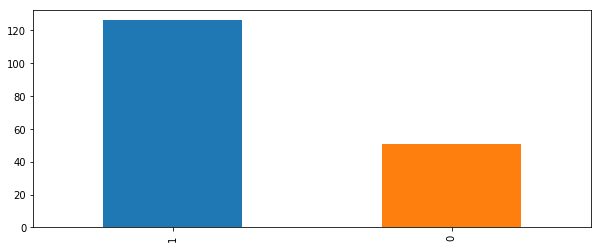

In [24]:
my_tags = ['Respondent','Complainant']
plt.figure(figsize=(10,4))
df.target.value_counts().plot(kind='bar');

### Train Test Split 

In [25]:
from sklearn import model_selection
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [26]:
print(len(X_train))
print(len(y_train))
print(len(y_test))

123
123
54


In [27]:
import numpy as np

In [28]:
print(np.bincount(y_train)) # 36 respondent and 76 complainant

[39 84]


In [29]:
print(np.bincount(y_test)) # 11 respondent and 38 complainant

[12 42]


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

### Model Building

### Naive Bayes Classifier for Multinomial Models

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [0.001, 0.01, 0.1 , 1.0, 2.0]
}


grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print('##################################################')
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print('##################################################')
y_pred = grid_search.best_estimator_.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__max_df': (0.5, 0.75, 1.0), 'vect__max_features': (None, 5000, 10000, 50000), 'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'clf__alpha': [0.001, 0.01, 0.1, 1.0, 2.0]}
Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  3.2min finished


done in 193.804s

##################################################
Best score: 0.772
Best parameters set:
	clf__alpha: 0.01
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__max_df: 0.75
	vect__max_features: 5000
	vect__ngram_range: (1, 2)
##################################################
accuracy 0.8333333333333334
              precision    recall  f1-score   support

  Respondent       0.67      0.50      0.57        12
 Complainant       0.87      0.93      0.90        42

   micro avg       0.83      0.83      0.83        54
   macro avg       0.77      0.71      0.73        54
weighted avg       0.82      0.83      0.82        54



### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

pipeline = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())
               ])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    #'clf__C': [1, 10, 100, 1000],
    #'clf__gamma': [0.001, 0.0001],
    'clf__n_neighbors':[5,6,7,8,9,11, 13, 15, 17, 19, 21, 23]
}


grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print('##################################################')
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print('##################################################')
y_pred = grid_search.best_estimator_.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__n_neighbors': [5, 6, 7, 8, 9, 11, 13, 15, 17, 19, 21, 23],
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  7.7min finished


done in 462.504s

##################################################
Best score: 0.764
Best parameters set:
	clf__n_neighbors: 6
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__ngram_range: (1, 2)
##################################################
accuracy 0.7777777777777778
              precision    recall  f1-score   support

  Respondent       0.50      0.25      0.33        12
 Complainant       0.81      0.93      0.87        42

   micro avg       0.78      0.78      0.78        54
   macro avg       0.66      0.59      0.60        54
weighted avg       0.74      0.78      0.75        54



### Linear Support Vector Machine

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

pipelineSVC = Pipeline([#('vect', CountVectorizer()),
                ('tfidf', TfidfVectorizer(max_df=1.0,max_features=5000,ngram_range=(1, 2),norm= 'l2',use_idf=True)),
                ('clf', SVC(C=1000,gamma=0.001,kernel='linear',))#SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),#SVC(kernel='linear')),#
               ])

parameters_svc = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__max_features': (None, 5000, 10000, 50000),
    'tfidf__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__C': [1, 10, 100, 1000],
    'clf__gamma': [0.001, 0.0001],
    'clf__kernel': ['rbf']
}


grid_search_svc = GridSearchCV(pipelineSVC, parameters_svc, cv=5, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipelineSVC.steps])
print("parameters:")
pprint(parameters_svc)
t0 = time()
grid_search_svc.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print('##################################################')
print("Best score: %0.3f" % grid_search_svc.best_score_)
#print("Best parameters set:")
#best_parameters = grid_search_svc.best_estimator_.get_params()
#for param_name in sorted(parameters.keys()):
#    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print('##################################################')
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_svc, y_test))
print(classification_report(y_test, y_pred_svc,target_names=my_tags))

Performing grid search...
pipeline: ['tfidf', 'clf']
parameters:
{'clf__C': [1, 10, 100, 1000],
 'clf__gamma': [0.001, 0.0001],
 'clf__kernel': ['rbf'],
 'tfidf__max_df': (0.5, 0.75, 1.0),
 'tfidf__max_features': (None, 5000, 10000, 50000),
 'tfidf__ngram_range': ((1, 1), (1, 2)),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False)}
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  8.3min finished


done in 495.827s

##################################################
Best score: 0.768
##################################################
accuracy 0.7142857142857143
              precision    recall  f1-score   support

  Respondent       0.33      0.27      0.30        11
 Complainant       0.80      0.84      0.82        38

   micro avg       0.71      0.71      0.71        49
   macro avg       0.57      0.56      0.56        49
weighted avg       0.70      0.71      0.70        49



### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

pipelineLogistic = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

parameters_logistic = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2')
}


grid_search_logistic = GridSearchCV(pipelineLogistic, parameters_logistic, cv=5, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters_logistic)
t0 = time()
grid_search_logistic.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print('##################################################')
#print("Best score: %0.3f" % grid_search_logistic.best_score_)
#print("Best parameters set:")
#best_parameters = grid_search_logistic.best_estimator_.get_params()
#for param_name in sorted(parameters.keys()):
#    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print('##################################################')
y_pred_logistic = grid_search.best_estimator_.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_logistic, y_test))
print(classification_report(y_test, y_pred_logistic,target_names=my_tags))
        

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.3min finished


done in 77.392s

##################################################
##################################################
accuracy 0.7777777777777778
              precision    recall  f1-score   support

  Respondent       0.50      0.25      0.33        12
 Complainant       0.81      0.93      0.87        42

   micro avg       0.78      0.78      0.78        54
   macro avg       0.66      0.59      0.60        54
weighted avg       0.74      0.78      0.75        54



### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier()),
               ])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__max_depth': [1, 2, 3, 4, 5],
    'clf__max_features': [1, 2, 3, 4],
    'clf__criterion':['gini','entropy']
}


grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print('##################################################')
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print('##################################################')
y_pred = grid_search.best_estimator_.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))
        

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__criterion': ['gini', 'entropy'],
 'clf__max_depth': [1, 2, 3, 4, 5],
 'clf__max_features': [1, 2, 3, 4],
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

done in 1518.286s

##################################################
Best score: 0.748
Best parameters set:
	clf__criterion: 'gini'
	clf__max_depth: 4
	clf__max_features: 3
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__max_df: 1.0
	vect__max_features: 10000
	vect__ngram_range: (1, 1)
##################################################
accuracy 0.7407407407407407
              precision    recall  f1-score   support

  Respondent       0.00      0.00      0.00        12
 Complainant       0.77      0.95      0.85        42

   micro avg       0.74      0.74      0.74        54
   macro avg       0.38      0.48      0.43        54
weighted avg       0.60      0.74      0.66        54



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier()),
               ])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__n_estimators':[10,15,20,25,30],
    'clf__max_depth': [5, 15, 25, 50],
    'clf__min_samples_leaf':[1,2,3],
    'clf__min_samples_split':[3,4,5,6,7],
    'clf__max_features':[5, 10, 20]
}


grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print('##################################################')
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print('##################################################')
y_pred = grid_search.best_estimator_.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))
        

### AdaBoostClassifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier

pipeline_ada = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', AdaBoostClassifier()),
               ])

parameters_ada = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (5000, 10000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__n_estimators':[10,20,25,30],
    'clf__learning_rate' : [0.01, 0.1, 0.9]
}


grid_search_ada = GridSearchCV(pipeline_ada, parameters_ada, cv=5, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_ada.steps])
print("parameters:")
pprint(parameters_ada)
t0 = time()
grid_search_ada.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print('##################################################')
print("Best score: %0.3f" % grid_search_ada.best_score_)
print("Best parameters set:")
best_parameters = grid_search_ada.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print('##################################################')
y_pred_ada = grid_search_ada.best_estimator_.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_ada, y_test))
print(classification_report(y_test, y_pred_ada,target_names=my_tags))
        

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__learning_rate': [0.01, 0.1, 0.9],
 'clf__n_estimators': [10, 20, 25, 30],
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (5000, 10000),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.3min finished


done in 77.078s

##################################################
Best score: 0.902
Best parameters set:
	clf__learning_rate: 0.9
	clf__n_estimators: 25
	vect__max_df: 0.75
	vect__ngram_range: (1, 1)
##################################################
accuracy 0.7755102040816326
              precision    recall  f1-score   support

  Respondent       0.50      0.73      0.59        11
 Complainant       0.91      0.79      0.85        38

   micro avg       0.78      0.78      0.78        49
   macro avg       0.70      0.76      0.72        49
weighted avg       0.82      0.78      0.79        49



### GradientBoostingClassifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', GradientBoostingClassifier())
               ])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__n_estimators':[10, 20, 30],
    #'clf__min_samples_leaf':[1,3],
    #'clf__max_depth': [3, 5,25],
    #'clf__min_samples_split':[2,5,7],
    'clf__learning_rate' : [0.01, 0.1,0.9],
    #'clf__subsample':[0.6,0.7, 1.0], 
    #'clf__max_features':[3, 5, 10, 20]
}


grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print('##################################################')
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print('##################################################')
y_pred = grid_search.best_estimator_.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))
        

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__learning_rate': [0.01, 0.1, 0.9],
 'clf__n_estimators': [10, 20, 30],
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   55.3s finished


done in 55.610s

##################################################
Best score: 0.866
Best parameters set:
	clf__learning_rate: 0.1
	clf__n_estimators: 20
	vect__max_df: 0.5
	vect__ngram_range: (1, 1)
##################################################
accuracy 0.8163265306122449
              precision    recall  f1-score   support

  Respondent       0.60      0.55      0.57        11
 Complainant       0.87      0.89      0.88        38

   micro avg       0.82      0.82      0.82        49
   macro avg       0.74      0.72      0.73        49
weighted avg       0.81      0.82      0.81        49



# Final Model - AdaBooster

In [33]:
from pprint import pprint
from time import time
import logging

#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier

print(__doc__)


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set

print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline_final_ada = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', AdaBoostClassifier())
    #('clf', AdaBoostClassifier(pipelineDTFinal.base_estimator))
])

pipeline_final_ada.fit(X_train, y_train)
    
    

Automatically created module for IPython interactive environment



Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [34]:
print('##################################################')
y_pred_ada = pipeline_final_ada.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_ada, y_test))
print(classification_report(y_test, y_pred_ada,target_names=my_tags))



##################################################
accuracy 0.8888888888888888
              precision    recall  f1-score   support

  Respondent       0.75      0.75      0.75        12
 Complainant       0.93      0.93      0.93        42

   micro avg       0.89      0.89      0.89        54
   macro avg       0.84      0.84      0.84        54
weighted avg       0.89      0.89      0.89        54



In [38]:
ADA_CM=metrics.confusion_matrix(y_test, y_pred_ada)
print(ADA_CM)

[[ 9  3]
 [ 3 39]]


In [71]:
#Sensitivity: True positive rate
sensitivity=ADA_CM[1,1]/(ADA_CM[1,0]+ADA_CM[1,1])
print(sensitivity)

0.9285714285714286


In [72]:
#Specificity: True negative rate
specificity=ADA_CM[0,0]/(ADA_CM[0,0]+ADA_CM[0,1])
print(specificity)

0.75


0.8392857142857143


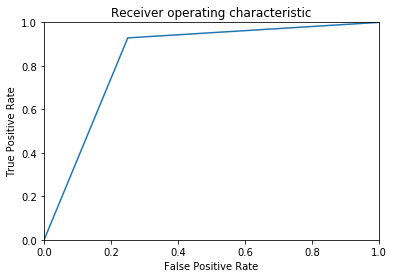

In [70]:
fpr,tpr, _ = roc_curve(y_test, y_pred_ada)
roc_auc = auc(fpr, tpr)

print(roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# Final Model - Support Vector Machine

In [39]:
pipelineSVCFinal = Pipeline([('vect', CountVectorizer(max_df=1.0,max_features=5000,ngram_range=(1,2))),
                ('tfidf', TfidfTransformer(norm='l2',use_idf=True)),
                ('clf', SVC(C=1000,gamma=0.001,kernel='rbf'))
               ])


pipelineSVCFinal.fit(X_train, y_train)


print('##################################################')
y_pred_svc = pipelineSVCFinal.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_svc, y_test))
print(classification_report(y_test, y_pred_svc,target_names=my_tags))

##################################################
accuracy 0.8518518518518519
              precision    recall  f1-score   support

  Respondent       0.70      0.58      0.64        12
 Complainant       0.89      0.93      0.91        42

   micro avg       0.85      0.85      0.85        54
   macro avg       0.79      0.76      0.77        54
weighted avg       0.84      0.85      0.85        54



In [41]:
SVC_CM=metrics.confusion_matrix(y_test, y_pred_svc)
print(SVC_CM)

[[ 7  5]
 [ 3 39]]


# Final Model - Logistic

In [43]:
from sklearn.linear_model import LogisticRegression
pipelineLRFinal = Pipeline([('vect', CountVectorizer(max_df=1.0,ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])



pipelineLRFinal.fit(X_train, y_train)


print('##################################################')
y_pred_LR = pipelineLRFinal.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_LR, y_test))
print(classification_report(y_test, y_pred_LR,target_names=my_tags))

##################################################
accuracy 0.8518518518518519
              precision    recall  f1-score   support

  Respondent       0.75      0.50      0.60        12
 Complainant       0.87      0.95      0.91        42

   micro avg       0.85      0.85      0.85        54
   macro avg       0.81      0.73      0.75        54
weighted avg       0.84      0.85      0.84        54



In [44]:
LR_CM=metrics.confusion_matrix(y_test, y_pred_LR)
print(LR_CM)

[[ 6  6]
 [ 2 40]]


# Final Model - KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

pipelineKNNFinal = Pipeline([('vect', CountVectorizer(max_df=0.75,max_features=10000,ngram_range=(1,1))),
                ('tfidf', TfidfTransformer(norm='l2',use_idf=True)),
                ('clf', KNeighborsClassifier(n_neighbors=6))])


pipelineKNNFinal.fit(X_train, y_train)


print('##################################################')
y_pred_KNN = pipelineKNNFinal.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_KNN, y_test))
print(classification_report(y_test, y_pred_KNN,target_names=my_tags))

##################################################
accuracy 0.7777777777777778
              precision    recall  f1-score   support

  Respondent       0.50      0.25      0.33        12
 Complainant       0.81      0.93      0.87        42

   micro avg       0.78      0.78      0.78        54
   macro avg       0.66      0.59      0.60        54
weighted avg       0.74      0.78      0.75        54



In [46]:
KNN_CM=metrics.confusion_matrix(y_test, y_pred_KNN)
print(KNN_CM)

[[ 3  9]
 [ 3 39]]


# Final Model - Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

pipelineNBFinal = Pipeline([('vect', CountVectorizer(max_df=0.5,max_features=5000,ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(norm='l2',use_idf=True)),
               ('clf', MultinomialNB(alpha=0.01)),
              ])

pipelineNBFinal.fit(X_train, y_train)


print('##################################################')
y_pred_NB_Final = pipelineNBFinal.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_NB_Final, y_test))
print(classification_report(y_test, y_pred_NB_Final,target_names=my_tags))


##################################################
accuracy 0.8518518518518519
              precision    recall  f1-score   support

  Respondent       0.75      0.50      0.60        12
 Complainant       0.87      0.95      0.91        42

   micro avg       0.85      0.85      0.85        54
   macro avg       0.81      0.73      0.75        54
weighted avg       0.84      0.85      0.84        54



In [48]:
NB_CM=metrics.confusion_matrix(y_test, y_pred_NB_Final)
print(NB_CM)

[[ 6  6]
 [ 2 40]]


# Final Model - Gradient 

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline_gradient_final = Pipeline([('vect', CountVectorizer(max_df=0.5,ngram_range=(1,1))),
                ('tfidf', TfidfTransformer()),
                ('clf', GradientBoostingClassifier(learning_rate=0.1,n_estimators=20))
               ])

pipeline_gradient_final.fit(X_train, y_train)


print('##################################################')
y_pred_Gradient_Final = pipeline_gradient_final.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_Gradient_Final, y_test))
print(classification_report(y_test, y_pred_Gradient_Final,target_names=my_tags))



##################################################
accuracy 0.8518518518518519
              precision    recall  f1-score   support

  Respondent       0.75      0.50      0.60        12
 Complainant       0.87      0.95      0.91        42

   micro avg       0.85      0.85      0.85        54
   macro avg       0.81      0.73      0.75        54
weighted avg       0.84      0.85      0.84        54



In [50]:
Gradient_CM=metrics.confusion_matrix(y_test, y_pred_Gradient_Final)
print(Gradient_CM)

[[ 6  6]
 [ 2 40]]


In [68]:
#Sensitivity: True positive rate
sensitivity=Gradient_CM[1,1]/(Gradient_CM[1,0]+Gradient_CM[1,1])
print(sensitivity)

0.9523809523809523


In [69]:
#Specificity: True negative rate
specificity=Gradient_CM[0,0]/(Gradient_CM[0,0]+Gradient_CM[0,1])
print(specificity)

0.5


0.7261904761904762


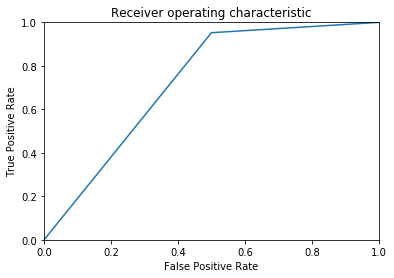

In [66]:
fpr,tpr, _ = roc_curve(y_test, y_pred_Gradient_Final)
roc_auc = auc(fpr, tpr)

print(roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# Final Model - Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

pipelineDTFinal = Pipeline([('vect', CountVectorizer(max_df=0.5,ngram_range=(1,1))),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=1)),
               ])

pipelineDTFinal.fit(X_train, y_train)


print('##################################################')
y_pred_DT_Final = pipelineDTFinal.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_DT_Final, y_test))
print(classification_report(y_test, y_pred_DT_Final,target_names=my_tags))

##################################################
accuracy 0.7777777777777778
              precision    recall  f1-score   support

  Respondent       0.00      0.00      0.00        12
 Complainant       0.78      1.00      0.88        42

   micro avg       0.78      0.78      0.78        54
   macro avg       0.39      0.50      0.44        54
weighted avg       0.60      0.78      0.68        54



In [52]:
DT_CM=metrics.confusion_matrix(y_test, y_pred_DT_Final)
print(DT_CM)

[[ 0 12]
 [ 0 42]]


# Final Model: Random Forest

In [56]:
pipelineRFFinal = Pipeline([('vect', CountVectorizer(max_df=1,ngram_range=(1,1))),
                ('tfidf', TfidfTransformer(norm='l2',use_idf=True)),
                ('clf', RandomForestClassifier(min_samples_leaf=2,max_depth=25,max_features=20,min_samples_split=6,n_estimators=10)),
               ])

pipelineRFFinal.fit(X_train, y_train)


print('##################################################')
y_pred_RF_Final = pipelineRFFinal.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_RF_Final, y_test))
print(classification_report(y_test, y_pred_RF_Final,target_names=my_tags))

##################################################
accuracy 0.7777777777777778
              precision    recall  f1-score   support

  Respondent       0.00      0.00      0.00        12
 Complainant       0.78      1.00      0.88        42

   micro avg       0.78      0.78      0.78        54
   macro avg       0.39      0.50      0.44        54
weighted avg       0.60      0.78      0.68        54



In [57]:
RF_CM=metrics.confusion_matrix(y_test, y_pred_RF_Final)
print(RF_CM)

[[ 0 12]
 [ 0 42]]


# Comparison of Models with TF-IDF vectorizer

LR: 0.721795 (0.088554)
Ada_Boost: 0.885256 (0.092426)
SVC: 0.754487 (0.100992)
KNN: 0.730769 (0.092539)
NB: 0.730769 (0.112828)
GB: 0.851923 (0.138659)
DT: 0.681410 (0.090566)
RF: 0.681410 (0.104786)


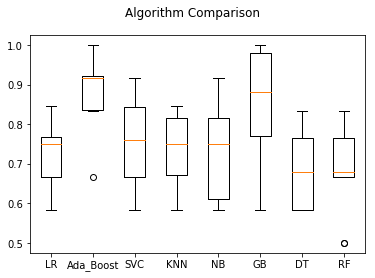

In [62]:
models = []

models.append(('LR',pipelineLRFinal))
models.append(('Ada_Boost',pipeline_final_ada))
models.append(('SVC',pipelineSVCFinal))
models.append(('KNN',pipelineKNNFinal))
models.append(('NB',pipelineNBFinal))
models.append(('GB',pipeline_gradient_final))
models.append(('DT',pipelineDTFinal))
models.append(('RF',pipelineRFFinal))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()